<a href="https://colab.research.google.com/github/regina-fonseca-avila/data_science/blob/main/logistic_regression/non_linear_decision_bondary_toy_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression 

## Non linear decision bondary

## Imports

In [12]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt 
import numpy as np

## Toy dataset

We use sklearn.datasets.make_circles. Make a large circle containing a smaller circle in 2d. A simple toy dataset to visualize clustering and classification algorithms.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles

## Dataset

In [13]:
X, y = make_circles(n_samples=600, shuffle=True, noise=0.07, random_state=42, factor=0.5)

- X = ndarray of shape (n_samples, 2)
The generated samples.

In [14]:
X

array([[-0.60690171,  0.77786932],
       [-0.39437491,  0.30651586],
       [ 0.2708101 , -0.36140943],
       ...,
       [ 0.88374895, -0.52840219],
       [-0.46981885,  0.24596752],
       [-0.59914282,  0.82311142]])

- y = ndarray of shape (n_samples,)
The integer labels (0 or 1) for class membership of each sample.

In [15]:
y

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,

## Auxiliary function


In [16]:
def plot_circle(X,y):
 plt.figure(figsize=(10,10))
 colormap = np.array(['red','deepskyblue'])
 plt.scatter(X[:, 0], X[:, 1], c= colormap[y])
 plt.axis('equal')

## Plot dataset

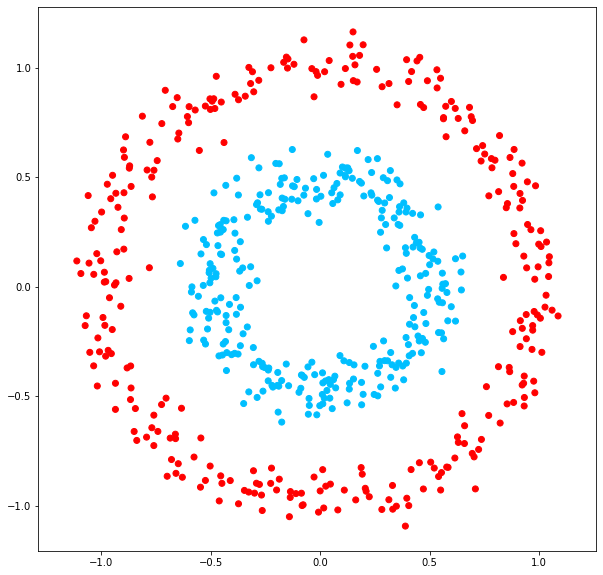

In [17]:
plot_circle(X,y)

- We have two groups. Big circle (red) and small circle (blue).

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X,y)

y_pred = lr.predict(X)

## Plot prediction - Logistc Regression

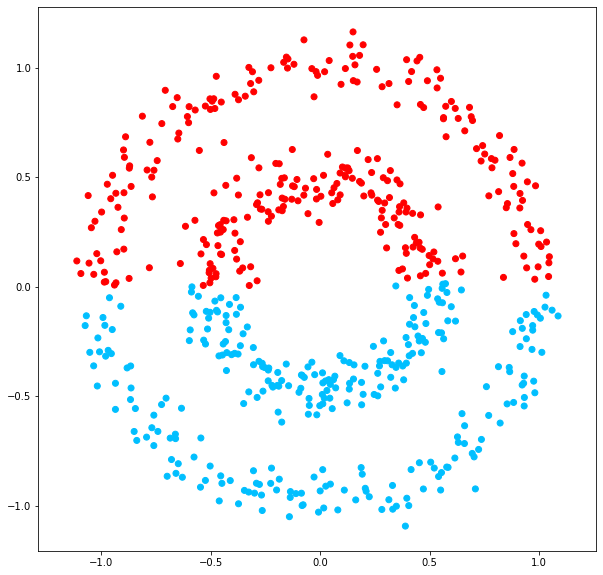

In [19]:
plot_circle(X,y_pred)

- LogisticRegression separates the data along a straight line. We have red and blue points em both circles.


## Feature Engineering

We have two concentric circles. We can use as feature the square distance to origem.

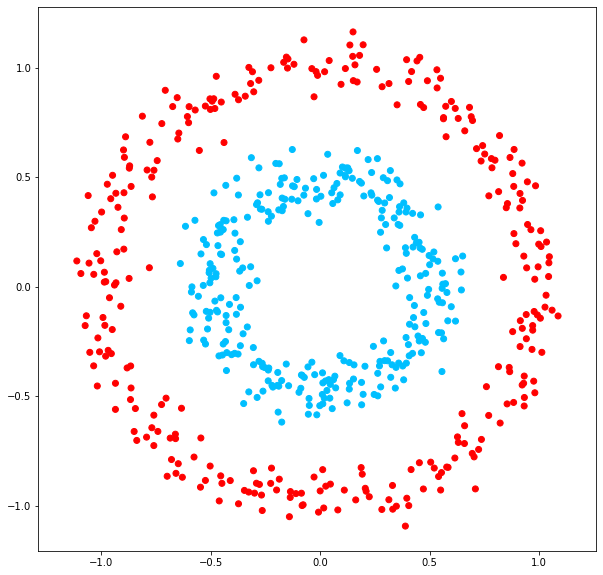

In [20]:
# squared distance to origem
d2 = X[:,0]**2+ X[:,1]**2
d2 = d2.reshape(-1, 1)

# fit
lr.fit(d2,y)

# predict
y_pred = lr.predict(d2)

# plot prediction
plot_circle(X, y_pred)

 - Now the points were classified as we expected. Two circles.

## Decision boundary

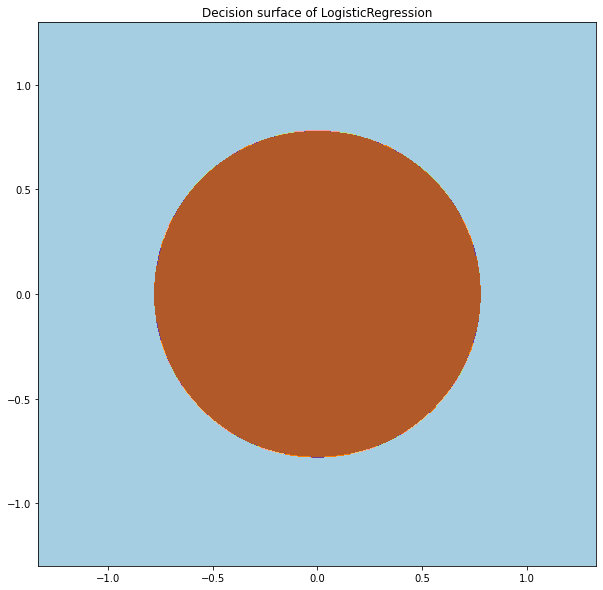

In [21]:
# create a mesh to plot in
h = .005  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
r2 = xx*xx + yy*yy
Z = lr.predict(r2.reshape(-1, 1))
## Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Decision surface of LogisticRegression")
plt.axis('equal')
plt.xlim([-1.3,1.3])
plt.ylim([-1.3,1.3]);

# https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html

## Dataset and Decicion boundary

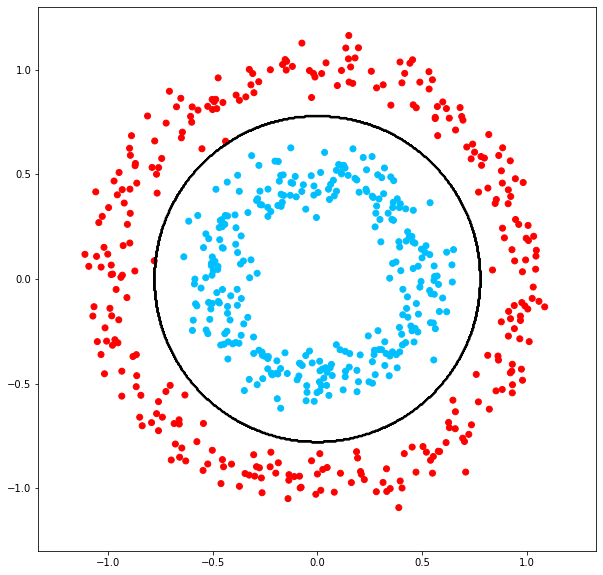

In [22]:
# create a mesh to plot in
h = .005  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# Plot the decision boundary. 
r2 = xx**2 + yy**2
Z = lr.predict(r2.reshape(-1, 1))
Z = Z.reshape(xx.shape)

# plot dataset and predictions
plot_circle(X,y_pred)

# plot decision boundary
plt.contour(xx, yy, Z,colors='k')

# limits
plt.xlim([-1.3,1.3])
plt.ylim([-1.3,1.3]);

- black line: decision boundary
- inside black circle: blue
- outside black circle: red